## Workings for 1a and 1b

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
#Read Data
store_data=pd.read_excel(r'C:\Users\kpali\OneDrive\Documents\Shopify 2022 Data Science Summer Intern Challenge\2019 Winter Data Science Intern Challenge Data Set.xlsx')

In [3]:
#Inspect columns and datatypes
store_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


In [4]:
store_data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [5]:
print('Number of records: ', len(store_data))
store_data.nunique()

Number of records:  5000


order_id          5000
shop_id            100
user_id            301
order_amount       258
total_items          8
payment_method       3
created_at        4995
dtype: int64

### Verifying AOV calculation is correct

In [6]:
#Order Amount Summary Statistics
store_data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

### Understanding cause of AOV error

{'whiskers': [<matplotlib.lines.Line2D at 0x28429f27a60>,
 'caps': [<matplotlib.lines.Line2D at 0x28429f3b160>,
 'boxes': [<matplotlib.lines.Line2D at 0x28429f27700>],
 'medians': [<matplotlib.lines.Line2D at 0x28429f3b820>],
 'fliers': [<matplotlib.lines.Line2D at 0x28429f3bb80>],
 'means': []}

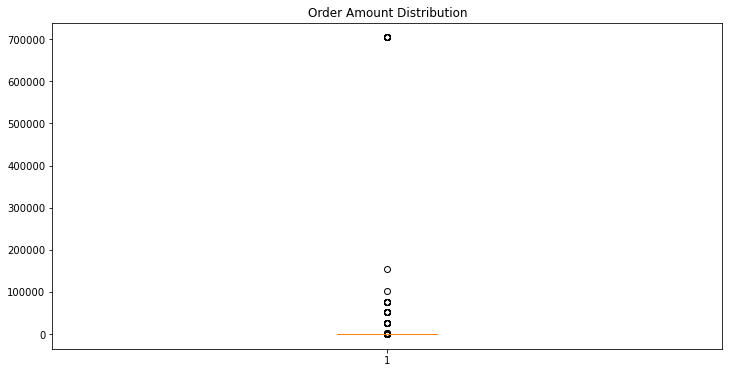

In [7]:
#Box Plot of order_amount
plt.figure(figsize=(12,6))
plt.title('Order Amount Distribution')
plt.boxplot(store_data['order_amount'])

As can be seen above, there are a number of orders exceeding the upper order_amount outlier threshold (Q3+1.5IQR)

In [8]:
# Total upper threshold outliers (Q3+1.5IQR)
upper_threshold=store_data['order_amount'].quantile(q=0.75) + 1.5*(store_data['order_amount'].quantile(q=0.75)-store_data['order_amount'].quantile(q=0.25))
outliers=store_data[store_data['order_amount']>upper_threshold]
print('Number of outliers upper threshold: ',len(outliers))

Number of outliers upper threshold:  141


In [9]:
# Display of all Outliers
pd.set_option('display.max_rows',150)
outliers.head(150)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
99,100,18,752,780,5,cash,2017-03-06 23:41:16.192
136,137,15,961,765,5,credit_card,2017-03-26 05:06:46.124
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:56.834
219,220,23,884,780,5,credit_card,2017-03-03 20:11:04.540
222,223,96,829,765,5,debit,2017-03-13 15:16:24.900
259,260,99,963,780,4,credit_card,2017-03-25 11:41:01.486
264,265,16,950,780,5,credit_card,2017-03-24 07:32:42.459
490,491,78,936,51450,2,debit,2017-03-26 17:08:18.911


The most impactful outliers on AOV come from shop_id 42 and 78

## Calculation for 1c

In [10]:
# Median Calculation
print(store_data['order_amount'].median())

284.0
